# **Redes neuronales en la clasificación de datos biomédicos** <a name="5"></a>

El corazón, una importante fuente de energía para el cuerpo humano, desempeña un papel importante en el sistema circulatorio al bombear aproximadamente 2000 galones de sangre a través de los vasos. Dada su importancia crítica, las enfermedades cardiovasculares (ECV), comúnmente conocidas como enfermedades cardíacas, emergen como la principal causa de morbilidad y mortalidad para las personas, independientemente de su género, raza y etnia. Más de cuatro de cada cinco muertes relacionadas con enfermedades cardiovasculares se atribuyen a ataques cardíacos, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años (OMS, 2019). Además, alrededor de 695.000 personas en los Estados Unidos murieron a causa de enfermedades cardíacas en 2021: 1 de cada 5 muertes (CDC, 2023). Tal gravedad requiere la urgente necesidad de abordar las enfermedades cardíacas como un problema de salud importante. Sin embargo, identificar la presencia de una enfermedad no sólo requiere evaluar la salud del corazón, sino también considerar varios factores de riesgo que contribuyen, incluidos la presión arterial y los niveles de colesterol altos, la diabetes y las frecuencias anormales del pulso. Para abordar esta complejidad, se pueden aplicar métodos de predicción de datos y aprendizaje automático para clasificar a las personas con riesgo de enfermedad cardíaca aprovechando conjuntos de datos de diferentes ubicaciones: Long Beach y Cleveland en Estados Unidos, Hungría y Suiza del repositorio de la UCI.

<img src = "https://dvl2h13awlxkt.cloudfront.net/assets/general-images/Knowledge/_1200x630_crop_center-center_82_none/Coronary-heart-disease.jpg?mtime=1657252250" width = '400' algin='left'>



In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Análisis Exploratorio de Datos**

## 1. Cargar datos <a name="1"></a>

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


%matplotlib inline

data = pd.read_csv("/content/drive/MyDrive/facu/Curso Posgrado - Técnicas de ML/Practica/Trabajo Final/heart_disease_uci.csv")
data.shape

(920, 16)

In [229]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 2. Descripción de los datos <a name="2"></a>

El conjunto de datos consta de 920 filas y 16 columnas, cada una de las cuales indica el número de pacientes y las características de diagnóstico. El objetivo es predecir la presencia de enfermedades cardíacas en el paciente. La salida se indica como valor entero de 0 (ausencia) a 4 (valor 1,2,3,4 como presencia).

### Columnas del dataset:
* **id**: identificación única para cada paciente
* **edad**: edad del paciente en años
* **sexo**:
   * Masculino
   * Femenino
* **dataset** (ubicación):
   *Cleveland
   * VA Long Beach
   * Hungría
   * Suiza
* **cp**: tipo de dolor en el pecho
   * Angina típica
   * Angina atípica
   * No anginoso
   * Asintomático
* **trestbps**: presión arterial en reposo (en mmHg al ingreso al hospital)
* **col**: cloesterol sérico en mg/dl
* **fbs**: si el nivel de azúcar en sangre en ayunas es > 120 mg/dl (V/F)
* **restecg**: resultados electrocardiográficos en reposo
   * Normal
   * Anormalidad St-t
   * Hipertrofia Lv (Hipertrofia ventricular izquierda)
* **thalch**: latido cardíaco máximo
* **exang**: angina inducida por el ejercicio (V/F)
* **oldpeak**: depresión del ST inducida por el ejercicio en relación con el reposo
* **slope**: la pendiente del segmento ST de ejercicio máximo
   * Sin pendiente
   * Departamento
   * Pendiente descendente
* **ca**: número de vasos principales coloreados por fluoroscopia (0-3)
* **thal**: un trastorno sanguíneo llamado talasemia: trastorno sanguíneo hereditario que no puede crear suficientes proteínas como la hemoglobina.
   * Defecto solucionado: falta de flujo sanguíneo en alguna parte del corazón
   * Normal
   * Defecto reversible: se observa un flujo sanguíneo pero no normal
* **num**: presencia o ausencia de enfermedad cardiaca (0-4)
   * 0: ausente
   * 1, 2, 3, 4: presente


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [231]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Detección de valores faltantes (NaN's) <a name="2.2"></a>

In [232]:
# Rellena los valores vacíos NaN con NaN
data = data.fillna(np.nan)
# Comprobar valores nulos
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

## 3. Analisis de datos <a name="3"></a>

### Matriz de correlación con Heatmap

La correlación mide la relación entre las características y la variable objetivo, indicando si están relacionadas positiva o negativamente.

<Axes: >

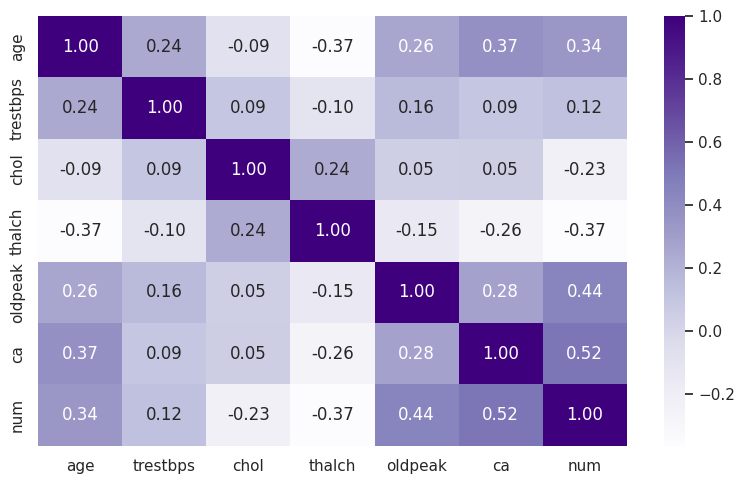

In [233]:
plt.figure(figsize=(8,5))
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(data[["age","trestbps","chol","thalch","oldpeak","ca","num"]].corr(),annot=True, fmt=".2f", cmap="Purples")

Las características que muestran una correlación significativa con la predicción de salida **num** son **ca**, **age** y **oldpeak**.

Además, **age** & **thalch**, **oldpeak** & **thalch**, y **ca** & **age** parecen mostrar una correlación ligeramente mayor en comparación con otras características. Por tanto, vale la pena analizar detenidamente estos atributos.

Dado que los 4 números enteros diferentes de la salida **num** indican el mismo resultado, que es la presencia de la enfermedad, se puede reemplazar como 1.

In [234]:
data['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [235]:
data['num'] = (data['num'] > 0)*1
data['num'].value_counts()

1    509
0    411
Name: num, dtype: int64

Text(0.5, 0, '')

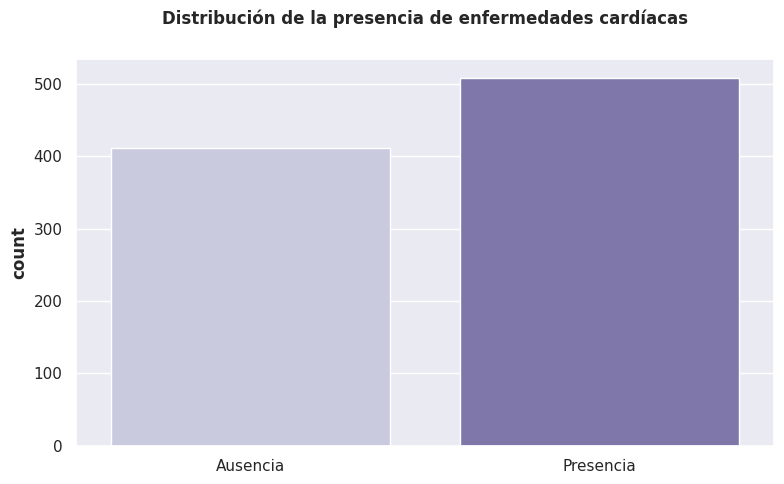

In [236]:
plt.figure(figsize=(8,5))
f = sns.countplot(data, x='num', palette='Purples')
f.set_title('Distribución de la presencia de enfermedades cardíacas\n')
f.set_xticklabels(['Ausencia', 'Presencia'])
plt.xlabel("")

## 4. Visualizacion de datos <a name="4"></a>

### 4.1 Valores númericos

### 4.1.1 Distribución de CA

**CA** (angiografía coronaria) se refiere al número de vasos principales coloreados mediante fluoroscopia. Puede ser un indicador crucial de la gravedad de las obstrucciones de las arterias coronarias y puede proporcionar información valiosa sobre la salud cardiovascular del paciente. Esta característica es la característica más correlacionada entre otras atribuidas al resultado.

In [237]:
data['ca'].value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

Text(0.5, 1.0, 'Distribución de CA por presencia de enfermedades\n')

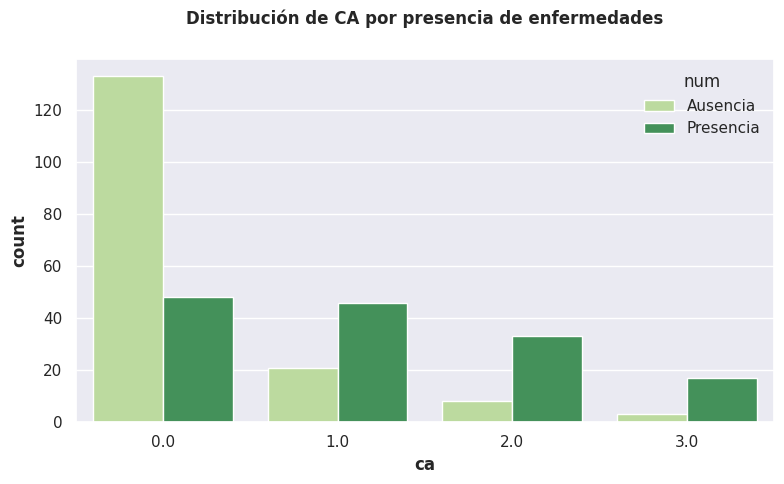

In [238]:
plt.figure(figsize=(8,5))
sns.countplot(data, x='ca', hue='num', palette='YlGn')
plt.legend(title='num', labels=['Ausencia', 'Presencia'])
plt.title('Distribución de CA por presencia de enfermedades\n')

La presencia de una mayor cantidad de vasos principales coloreados indica una mayor probabilidad de obstrucciones o estrechamientos importantes en las arterias. Esto sugiere una mayor probabilidad de enfermedad cardíaca en el paciente.

### 4.1.2 Distribución de Oldpeak

**Oldpeak** es una depresión del ST inducida por el ejercicio en relación con el reposo, y el segmento ST indica el intervalo entre S y T en el electrocardiograma (ECG), que representa la actividad eléctrica del corazón. Esto ocurre a menudo por la obstrucción del flujo sanguíneo al músculo cardíaco y puede provocar un ataque cardíaco.

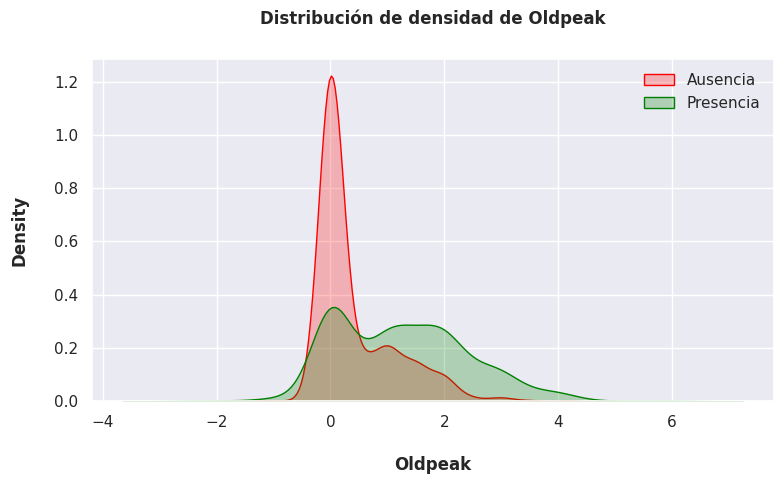

In [239]:
plt.figure(figsize=(8,5))
g = sns.kdeplot(data["oldpeak"][(data["num"] == 0) & (data["oldpeak"].notnull())], color="red", fill=True)
g = sns.kdeplot(data["oldpeak"][(data["num"] == 1) & (data["oldpeak"].notnull())], ax =g, color="green", fill=True)
g.set_xlabel("\nOldpeak")
g.set_ylabel("Density\n")
g.set_title('Distribución de densidad de Oldpeak\n')
g = g.legend(["Ausencia","Presencia"])

Al analizar el gráfico de densidad del núcleo, se hace evidente que los pacientes sin enfermedad cardíaca tienen una mayor probabilidad de no presentar depresión del ST (pico antiguo = 0). Esta observación implica que con un aumento en el valor oldpeak, la probabilidad de presencia de enfermedad cardíaca también aumenta.

### 4.1.3 Distribucion de Age


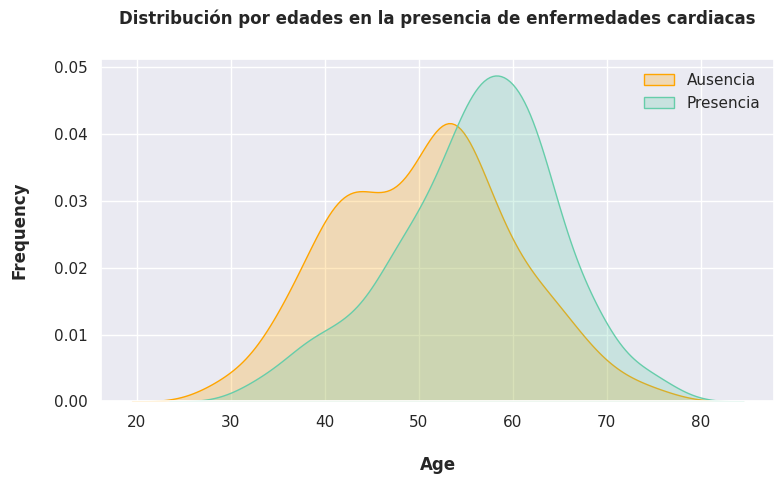

In [240]:
plt.figure(figsize=(8, 5))
g = sns.kdeplot(data["age"][(data["num"] == 0) & (data["age"].notnull())], color="Orange", fill=True)
g = sns.kdeplot(data["age"][(data["num"] == 1) & (data["age"].notnull())], ax =g, color="mediumaquamarine", fill=True)
g.set_title('Distribución por edades en la presencia de enfermedades cardiacas\n')
g.set_xlabel("\nAge")
g.set_ylabel("Frequency\n")
g = g.legend(["Ausencia","Presencia"])

Según las observaciones de ambos gráficos de distribución, las personas con una enfermedad cardíaca exhiben un pico prominente a partir de los 60 años. En consecuencia, los datos sugieren que la probabilidad de sufrir enfermedades cardíacas aumenta con la edad.

### 4.2 Valores categóricos<a name="4.2"></a>

### 4.2.1 Distribucion de Sexo

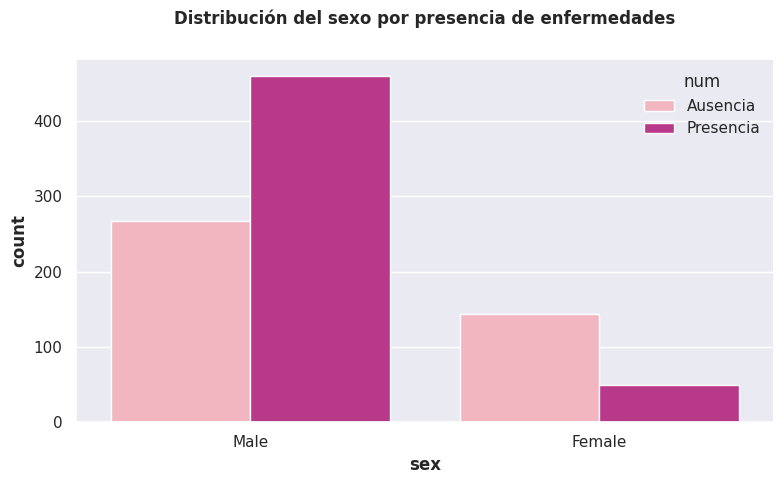

In [241]:
plt.figure(figsize=(8, 5))

sns.countplot(data, x='sex', hue='num', palette='RdPu')

plt.title('Distribución del sexo por presencia de enfermedades\n')
plt.legend(title='num', labels=['Ausencia', 'Presencia'])

In [242]:
data[["sex","num"]].groupby('sex').mean()

,num
sex,
Female,0.257732
Male,0.632231


El gráfico de recuento indica claramente una mayor probabilidad de enfermedad cardíaca entre los hombres que entre las mujeres.

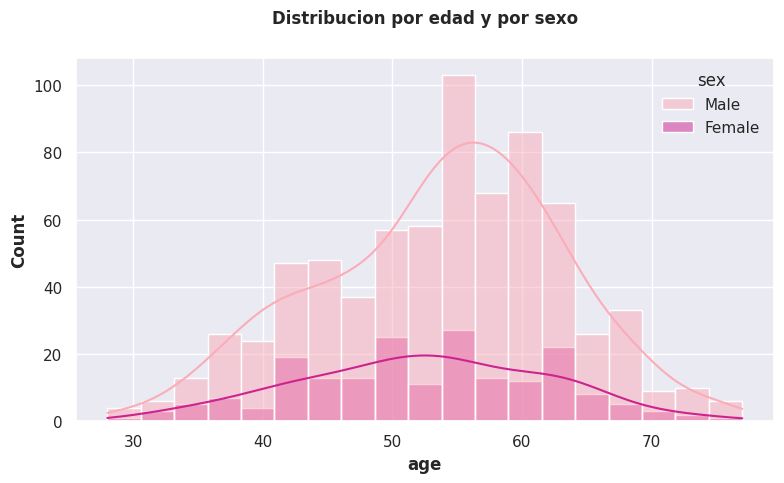

In [243]:
plt.figure(figsize=(8, 5))
sns.histplot(data, x='age', kde=True, hue='sex', palette='RdPu')
plt.title('Distribucion por edad y por sexo\n')
plt.show()

Al comparar el **sexo** y la **edad**, los hombres de entre 50 y 60 años tienen una mayor probabilidad de sufrir una enfermedad cardíaca.

### 4.2.2 Distribución de CP

**Cp** indica el tipo de dolor en el pecho en el tipo de datos nominal que se puede clasificar en cuatro tipos.
   * Angina típica: el dolor en el pecho ocurre cuando el corazón no suministra sangre rica en oxígeno.
   * Angina atípica: dolor en el pecho pero no relacionado con la angina
   * No anginoso: no presenta dolor en el pecho - síntomas menos comunes como debilidad, desmayos, sudoración, náuseas, etc.
   * Asintomático: no presenta síntomas.

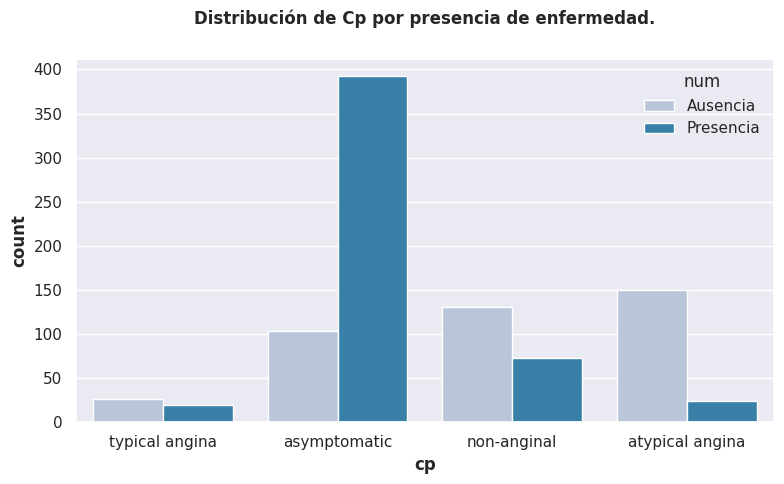

In [244]:
plt.figure(figsize=(8, 5))
sns.countplot(data, x='cp', hue='num', palette='PuBu')
plt.title('Distribución de Cp por presencia de enfermedad.\n')
plt.legend(title='num', labels=['Ausencia', 'Presencia'])

Este gráfico sugiere que no existen síntomas distintivos que puedan indicar de manera confiable si los pacientes tienen una enfermedad cardíaca o no.

### 4.2.3 Distribucion de Exang

**Exang** es el tipo de datos nominal binario (T/F) que indica la angina inducida por el ejercicio. Es inducido por el ejercicio, el estrés u otros efectos para hacer que el corazón trabaje más (Harvard Health, 2021).


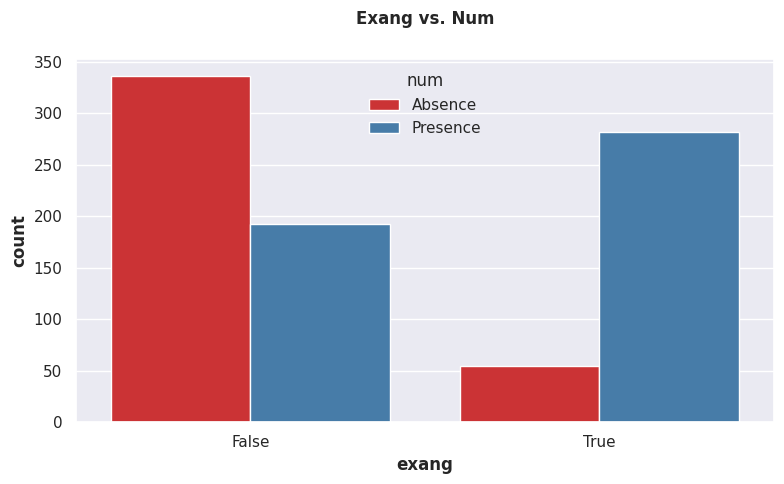

In [245]:
plt.figure(figsize=(8, 5))
sns.countplot(data, x='exang', hue='num', palette='Set1')
plt.title('Exang vs. Num\n')
plt.legend(title = 'num', labels=['Absence', 'Presence'])

El gráfico de recuento muestra que los pacientes sin enfermedad cardíaca tienen mayor angina inducida por el ejercicio que los pacientes con enfermedad cardíaca.

### 4.2.4 Distribucion de Slope
**Slope** indica el segmento ST de ejercicio máximo en el tipo de datos nominal y consta de tres tipos:
* Upsloping: respuesta normal (segmento ST positivo)
* Plano (Horizontal): no es normal, este estado puede indicar isquemia coronaria que define el flujo sanguíneo reducido.
* Pendiente descendente: una depresión del ST que es muy relativa a la característica **oldpeak**.

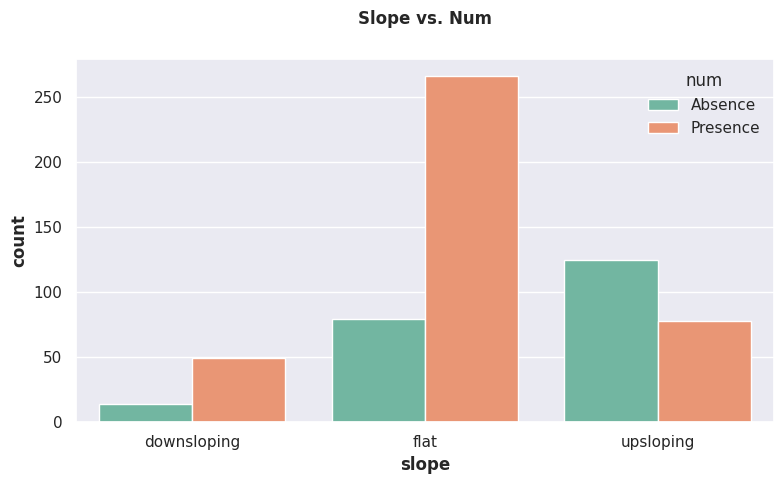

In [246]:
plt.figure(figsize=(8, 5))
sns.countplot(data, x='slope', hue='num', palette='Set2')
plt.title('Slope vs. Num\n')
plt.legend(title='num', labels=['Absence', 'Presence'])

El gráfico de recuento destaca una aparición significativa de pendientes "ascendentes" (normales) entre pacientes sin enfermedad cardíaca. Por el contrario, la pendiente "plana", que es menos común, es más frecuente entre los pacientes con enfermedades cardíacas.

# **Preprocesamiento de datos** <a name="5"></a>

Después de visualizar todas las características nominales y numéricas, ahora necesitamos preprocesar los datos para crear el modelo de aprendizaje automático.

In [247]:
hd_df = data.copy(deep=True)

Es necesario cambiar el nombre de algunas columnas para completar los espacios en algunos atributos y dejar claro el significado de la abreviatura.


In [248]:
hd_df.columns = ['ID','age', 'sex', 'location', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

hd_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       920 non-null    int64  
 1   age                      920 non-null    int64  
 2   sex                      920 non-null    object 
 3   location                 920 non-null    object 
 4   chest_pain_type          920 non-null    object 
 5   resting_blood_pressure   861 non-null    float64
 6   cholesterol              890 non-null    float64
 7   fasting_blood_sugar      830 non-null    object 
 8   rest_ecg_type            918 non-null    object 
 9   max_heart_rate_achieved  865 non-null    float64
 10  exercise_induced_angina  865 non-null    object 
 11  st_depression            858 non-null    float64
 12  st_slope_type            611 non-null    object 
 13  num_major_vessels        309 non-null    float64
 14  thalassemia_type         4

In [249]:
hd_df['location'].replace({'VA Long Beach':'VA_Long_Beach'}, inplace=True)
hd_df['chest_pain_type'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina'}, inplace=True)
hd_df["rest_ecg_type"].replace({'lv hypertrophy': 'lv_hypertrophy', 'st-t abnormality': 'stt_abnormality'}, inplace=True)
hd_df['thalassemia_type'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversible_defect'}, inplace=True)

hd_df.head()

,ID,age,sex,location,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,1,63,Male,Cleveland,typical_angina,145.0,233.0,True,lv_hypertrophy,150.0,False,2.3,downsloping,0.0,fixed_defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv_hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv_hypertrophy,129.0,True,2.6,flat,2.0,reversible_defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical_angina,130.0,204.0,False,lv_hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 5.1 Reemplazo de valores nulos

Faltan una gran cantidad de datos en la columna **location** en Suiza y otros países. Originalmente, existían 920 valores no nulos en el conjunto de datos. Sin embargo, con solo eliminar el valor que falta, solo existen 299 valores, lo que provoca una pérdida excesiva de datos.

In [250]:
data['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

Por lo tanto, es necesario imputar todos los valores nulos con media o mediana para el tipo de datos numérico y moda para el tipo de datos nominal en lugar de descartar las filas.

In [251]:
locations = set(hd_df['location'])

for place in locations:

  # Completa por separado los valores nulos de cada lugar
  l_df = hd_df[hd_df['location']== place]

  for column in l_df.columns:
    # Completa los valores nominales (categóricos) faltantes con la moda (valor más frecuente)
    if column == 'num_major_vessels' or l_df[column].dtype != 'int64':
      l_df[column].fillna(l_df[column].mode()[0], inplace=True)
    else:
      # Completa los valores numéricos faltantes con la media
      l_df[column].fillna(l_df.mean(numeric_only=True), inplace=True)

  hd_df.update(l_df)

<ipython-input-251-279a78aa1dd9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_df[column].fillna(l_df.mean(numeric_only=True), inplace=True)
<ipython-input-251-279a78aa1dd9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_df[column].fillna(l_df.mean(numeric_only=True), inplace=True)
<ipython-input-251-279a78aa1dd9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_df[column].fillna(l_df[column].mode()[0], inplace=True)
<ipy

In [252]:
hd_df.isnull().sum()

ID                         0
age                        0
sex                        0
location                   0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg_type              0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope_type              0
num_major_vessels          0
thalassemia_type           0
target                     0
dtype: int64

In [253]:
hd_df.shape

(920, 16)

In [254]:
hd_df['target'] = ((data['num'] > 0)*1)

## 5.2 Eliminación de la menor correlación <a name="5.4"></a>

En el mapa de calor anterior, una característica **chol** muestra la menor correlación con el objetivo, lo que podría confundir al modelo en su predicción. Además, una característica **cp** que es un tipo de datos nominal tampoco muestra relación debido a los pacientes asintomáticos.

In [255]:
del hd_df['cholesterol']
del hd_df['chest_pain_type']

Además, una característica **ID** que no se haya utilizado en el conjunto de datos también se puede eliminar para reducir la dimensionalidad.

In [256]:
del hd_df['ID']

In [257]:
hd_df.info()
hd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      920 non-null    float64
 1   sex                      920 non-null    object 
 2   location                 920 non-null    object 
 3   resting_blood_pressure   920 non-null    float64
 4   fasting_blood_sugar      920 non-null    object 
 5   rest_ecg_type            920 non-null    object 
 6   max_heart_rate_achieved  920 non-null    float64
 7   exercise_induced_angina  920 non-null    object 
 8   st_depression            920 non-null    float64
 9   st_slope_type            920 non-null    object 
 10  num_major_vessels        920 non-null    float64
 11  thalassemia_type         920 non-null    object 
 12  target                   920 non-null    int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 93.6+ KB


,age,sex,location,resting_blood_pressure,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63.0,Male,Cleveland,145.0,True,lv_hypertrophy,150.0,False,2.3,downsloping,0.0,fixed_defect,0
1,67.0,Male,Cleveland,160.0,False,lv_hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67.0,Male,Cleveland,120.0,False,lv_hypertrophy,129.0,True,2.6,flat,2.0,reversible_defect,1
3,37.0,Male,Cleveland,130.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41.0,Female,Cleveland,130.0,False,lv_hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 5.3 Normalización <a name="5.6"></a>

Para evitar que el modelo dé mayor peso a entidades con valores mayores, se requiere escalar para garantizar que todas las entidades tengan la misma escala o unidad.


In [258]:
hd_df.columns

Index(['age', 'sex', 'location', 'resting_blood_pressure',
       'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type',
       'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [259]:
# Convertir a valores categoricos
le = LabelEncoder()
hd_df["sex"] = le.fit_transform(hd_df["sex"])
hd_df["location"] = le.fit_transform(hd_df["location"])
hd_df["fasting_blood_sugar"] = le.fit_transform(hd_df["fasting_blood_sugar"])
hd_df["rest_ecg_type"] = le.fit_transform(hd_df["rest_ecg_type"])
hd_df["exercise_induced_angina"] = le.fit_transform(hd_df["exercise_induced_angina"])
hd_df["st_slope_type"] = le.fit_transform(hd_df["st_slope_type"])
hd_df["thalassemia_type"] = le.fit_transform(hd_df["thalassemia_type"])

In [260]:
y = hd_df["target"]
del hd_df["target"]
X = hd_df
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(hd_df)
X_scaled = pd.DataFrame(scaled_columns, columns=hd_df.columns)

<u> Antes vs. Despues de Normalizar </u>

In [261]:
X.head(10)

,age,sex,location,resting_blood_pressure,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type
0,63.0,1,0,145.0,1,0,150.0,0,2.3,0,0.0,0
1,67.0,1,0,160.0,0,0,108.0,1,1.5,1,3.0,1
2,67.0,1,0,120.0,0,0,129.0,1,2.6,1,2.0,2
3,37.0,1,0,130.0,0,1,187.0,0,3.5,0,0.0,1
4,41.0,0,0,130.0,0,0,172.0,0,1.4,2,0.0,1
5,56.0,1,0,120.0,0,1,178.0,0,0.8,2,0.0,1
6,62.0,0,0,140.0,0,0,160.0,0,3.6,0,2.0,1
7,57.0,0,0,120.0,0,1,163.0,1,0.6,2,0.0,1
8,63.0,1,0,130.0,0,0,147.0,0,1.4,1,1.0,2
9,53.0,1,0,140.0,1,0,155.0,1,3.1,0,0.0,2


In [262]:
X_scaled.head(10)

,age,sex,location,resting_blood_pressure,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type
0,1.007386,0.516931,-1.095558,0.731077,2.380476,-1.567991,0.528989,-0.857816,1.375873,-2.233021,-0.567750,-2.993948
1,1.432034,0.516931,-1.095558,1.534074,-0.420084,-1.567991,-1.120339,1.165751,0.632376,-0.296754,2.953577,-1.215748
2,1.432034,0.516931,-1.095558,-0.607252,-0.420084,-1.567991,-0.295675,1.165751,1.654684,-0.296754,1.779802,0.562452
3,-1.752828,0.516931,-1.095558,-0.071921,-0.420084,0.015491,1.981968,-0.857816,2.491118,-2.233021,-0.567750,-1.215748
4,-1.328180,-1.934494,-1.095558,-0.071921,-0.420084,-1.567991,1.392922,-0.857816,0.539439,1.639513,-0.567750,-1.215748
5,0.264251,0.516931,-1.095558,-0.607252,-0.420084,0.015491,1.628540,-0.857816,-0.018183,1.639513,-0.567750,-1.215748
6,0.901224,-1.934494,-1.095558,0.463411,-0.420084,-1.567991,0.921686,-0.857816,2.584055,-2.233021,1.779802,-1.215748
7,0.370413,-1.934494,-1.095558,-0.607252,-0.420084,0.015491,1.039495,1.165751,-0.204057,1.639513,-0.567750,-1.215748
8,1.007386,0.516931,-1.095558,-0.071921,-0.420084,-1.567991,0.411179,-0.857816,0.539439,-0.296754,0.606026,0.562452
9,-0.054235,0.516931,-1.095558,0.463411,2.380476,-1.567991,0.725337,1.165751,2.119369,-2.233021,-0.567750,0.562452


In [263]:
# Convertir a valores categoricos
le = LabelEncoder()
X_scaled["sex"] = le.fit_transform(X_scaled["sex"])
X_scaled["location"] = le.fit_transform(X_scaled["location"])
X_scaled["fasting_blood_sugar"] = le.fit_transform(X_scaled["fasting_blood_sugar"])
X_scaled["rest_ecg_type"] = le.fit_transform(X_scaled["rest_ecg_type"])
X_scaled["exercise_induced_angina"] = le.fit_transform(X_scaled["exercise_induced_angina"])
X_scaled["st_slope_type"] = le.fit_transform(X_scaled["st_slope_type"])
X_scaled["thalassemia_type"] = le.fit_transform(X_scaled["thalassemia_type"])

In [264]:
X_scaled

,age,sex,location,resting_blood_pressure,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type
0,1.007386,1,0,0.731077,1,0,0.528989,0,1.375873,0,-0.567750,0
1,1.432034,1,0,1.534074,0,0,-1.120339,1,0.632376,1,2.953577,1
2,1.432034,1,0,-0.607252,0,0,-0.295675,1,1.654684,1,1.779802,2
3,-1.752828,1,0,-0.071921,0,1,1.981968,0,2.491118,0,-0.567750,1
4,-1.328180,0,0,-0.071921,0,0,1.392922,0,0.539439,2,-0.567750,1
...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.051927,0,3,-0.232520,1,2,0.686067,0,-0.761680,1,-0.567750,2
916,0.901224,1,3,-0.607252,0,2,-0.649103,1,-0.761680,1,-0.567750,2
917,0.158089,1,3,-0.500186,1,2,-1.434497,0,-0.761680,1,-0.567750,0
918,0.476575,1,3,-0.607252,1,0,-0.649103,1,-0.761680,1,-0.567750,2


# **Modelado** <a name="5"></a>

Una vez realizado el preprocesamiento de los datos, el siguiente paso es recopilar las columnas y dividir los datos en conjuntos de entrenamiento y de prueba.

In [265]:
X = np.array(X_scaled)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(736, 12) (184, 12)
(736,) (184,)


Definir la configuracion de un nuevo modelo de keras para clasificación binaria

In [266]:
def create_model():
    # Crear el modelo
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(6, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dropout_6 (Dropout)         (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dropout_7 (Dropout)         (None, 6)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [267]:
# Entrenar el modelo con los datos de entrenamiento
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Epoch 1/50
74/74 [==============================] - 1s 8ms/step - loss: 0.6820 - accuracy: 0.5856 - val_loss: 0.6588 - val_accuracy: 0.6848
Epoch 2/50
74/74 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.6698 - val_loss: 0.5898 - val_accuracy: 0.7663
Epoch 3/50
74/74 [==============================] - 0s 4ms/step - loss: 0.5821 - accuracy: 0.7514 - val_loss: 0.5415 - val_accuracy: 0.7935
Epoch 4/50
74/74 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.7609 - val_loss: 0.5049 - val_accuracy: 0.8207
Epoch 5/50
74/74 [==============================] - 0s 4ms/step - loss: 0.5253 - accuracy: 0.7935 - val_loss: 0.4815 - val_accuracy: 0.8261
Epoch 6/50
74/74 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.8003 - val_loss: 0.4625 - val_accuracy: 0.8261
Epoch 7/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7935 - val_loss: 0.4536 - val_accuracy: 0.8207
Epoch 8/50
74/74 [==

# **Resultados y Métricas**

In [268]:
# Funciones utiles

def plot_model(metric,val_metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[val_metric])
    plt.title(f'Model {metric}')
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

def conf_matrix(y, y_pred):
    fig, ax =plt.subplots(figsize=(3.5,3.5))
    labels=['No','Yes']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title('Heart Disease?', fontsize=17)
    ax.xaxis.set_ticklabels(labels, fontsize=17)
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test')
    ax.set_xlabel('Predicted')

def curve_roc(y, y_pred):
    plt.figure(figsize = (5.5, 4))

    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve',fontsize=25)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.legend(loc = 'lower right', fontsize=24, fancybox=True, shadow=True, frameon=True, handlelength=0)
    plt.show()

In [269]:
y_pred = np.round(model.predict(X_test)).astype(int)

print('\nReporte de clasificacion: \n')
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 2ms/step

Reporte de clasificacion: 

              precision    recall  f1-score   support

           0       0.74      0.85      0.80        75
           1       0.89      0.80      0.84       109

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



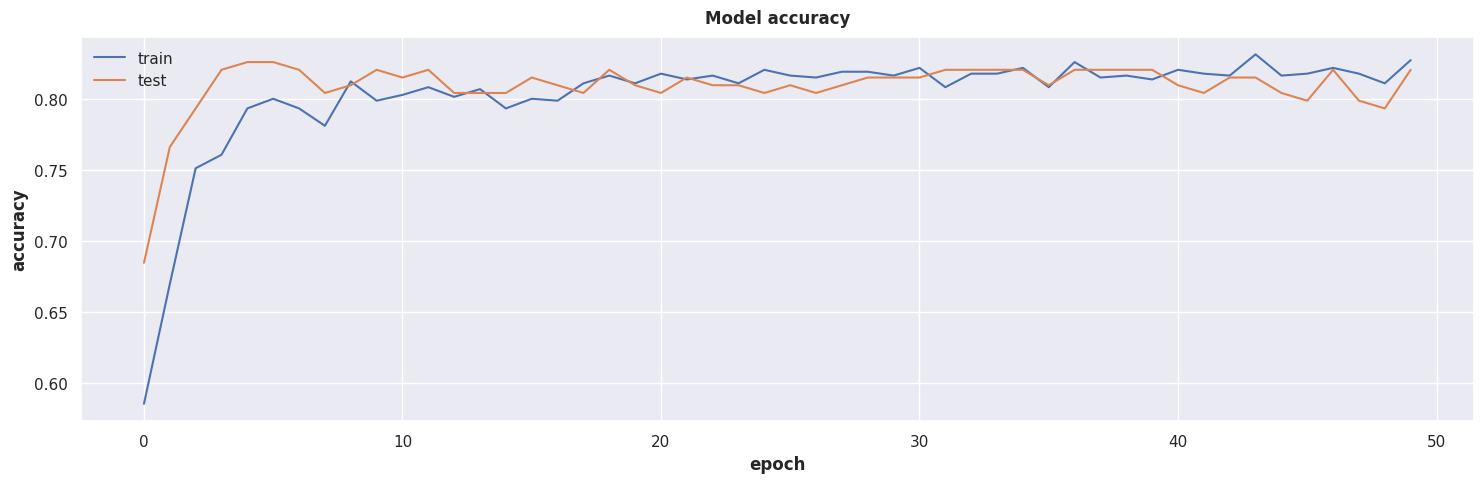

In [270]:
plot_model('accuracy','val_accuracy')

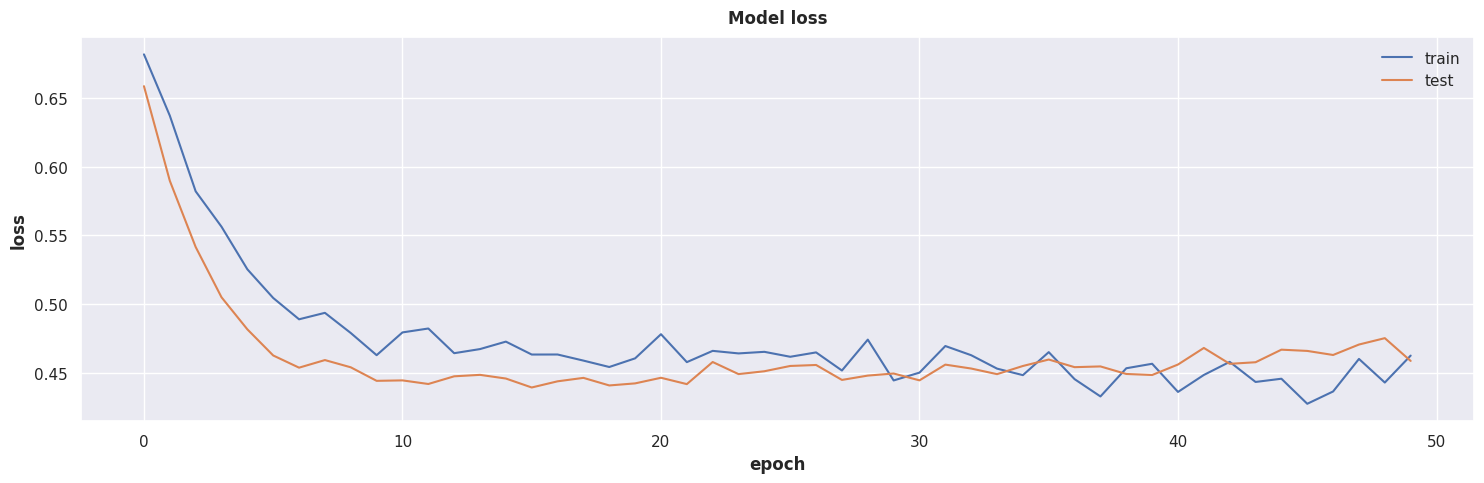

In [271]:
plot_model('loss','val_loss')

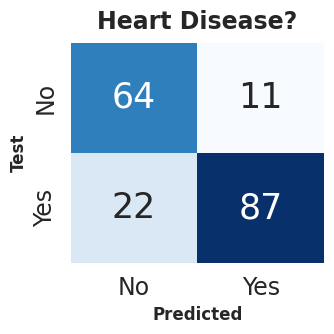

In [272]:
conf_matrix(y_test,y_pred)

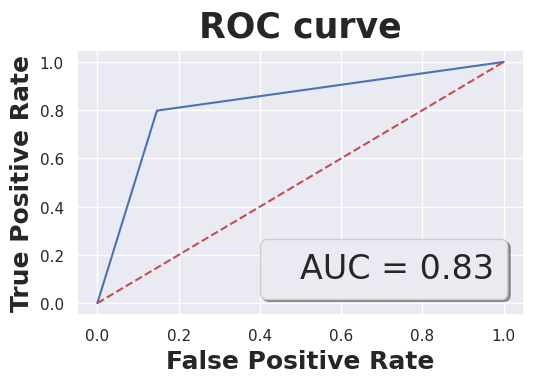

In [273]:
curve_roc(y_test,y_pred)

**CONCLUSIONES**:

Como resultado obtenemos un modelo que clasifica correctamente con 83% de precisión en un set de testeo de 184 pacientes. En un total de 75 pacientes que no padecían una enfermedad cardiaca, el modelo predice en un 87% correctamente, mientras que para los casos en que los pacientes si padecían una enfermedad cardiaca, siendo este un total de 109 pacientes, el modelo predice en un 78% correctamente.

Próximos pasos: probar modificando las configuraciones de la red neuronal como los optimizadores, el learning_rate, las epoch de entrenamiento, etc. para obtener mejores resultados en las predicciones del modelo.
